In [16]:
from spatial_compare import SpatialCompare
import spatial_compare
import anndata as ad

barcode = '1370519421'
seg_name_a = 'XEN'
seg_name_b = 'SIS'
base_path = './'
anndata_a = ad.read_h5ad("./data/anndata_a.h5ad")
anndata_b = ad.read_h5ad("./data/anndata_b.h5ad")

print(anndata_a)
print(anndata_b)

AnnData object with n_obs × n_vars = 1526 × 278
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'region', 'z_level', 'cell_labels', 'CDM_Class_label', 'CDM_Class_name', 'CDM_Class_bootstrapping_probability', 'CDM_Class_avg_correlation', 'CDM_Class_aggregate_probability', 'CDM_Class_directly_assigned', 'CDM_Subclass_label', 'CDM_Subclass_name', 'CDM_Subclass_bootstrapping_probability', 'CDM_Subclass_avg_correlation', 'CDM_Subclass_aggregate_probability', 'CDM_Subclass_directly_assigned', 'CDM_Supertype (non-expanded)_label', 'CDM_Supertype (non-expanded)_name', 'CDM_Supertype (non-expanded)_alias', 'CDM_Supertype (non-expanded)_bootstrapping_probability', 'CDM_Supertype (non-expanded)_avg_correlation', 'CDM_Supertype (non-expanded)_aggregate_probability', 'CDM_Supertype (non-

In [17]:
sc = SpatialCompare(anndata_a, anndata_b, data_names=[seg_name_a, seg_name_b], obsm_key='spatial')
seg_comp_df = sc.collect_mutual_match_and_doublets(bc=barcode, save=False, reuse_saved=False, savepath='./', min_transcripts=40)

#Integration tests:
#test that all items copied over from anndata objects
seg_a_df = seg_comp_df[seg_comp_df['source']==seg_name_a]
seg_b_df = seg_comp_df[seg_comp_df['source']==seg_name_b]
assert len(anndata_a) == len(seg_a_df)
assert len(anndata_b) == len(seg_b_df)

#test same number of mutually matched cells
high_q_a_cells = seg_a_df[seg_a_df['low_quality_cells']==False]
high_q_b_cells = seg_b_df[seg_b_df['low_quality_cells']==False]
len(high_q_a_cells.iloc[:,4].dropna()) == len(high_q_b_cells.iloc[:,4].dropna()) 

input anndata objects have 240 shared genes


/mnt/scratch1/miniconda3/envs/SpaceHacks-luke/lib/python3.11/site-packages/spatial_compare/spatial_compare.py:135: UserWarning: category subclass is not in both input AnnData objects
  warnings.warn(


True

In [24]:
# test adjusted-rand-index
spatial_compare.utils.returnARI(sc, seg_comp_df, 'XEN', 'SIS')

Adjusted Rand Index: 0.7329270162658587


0.7329270162658587

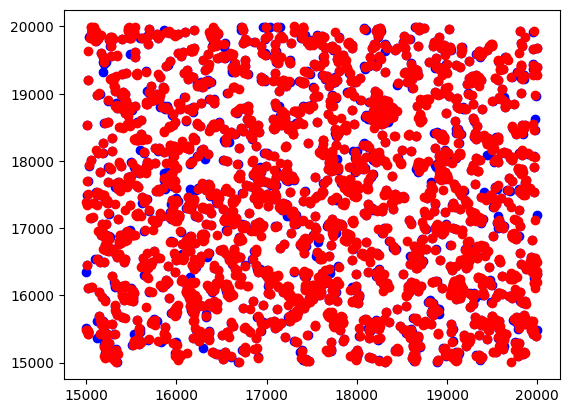

Average data range: 4998.30379710478
Hausdorff Distance: 133.94056574740048
Hausdorff Distance normalized to range (%): 2.67972038484304


2.67972038484304

In [25]:
spatial_compare.utils.get_normalized_Hausdorff(seg_comp_df,'XEN','SIS')

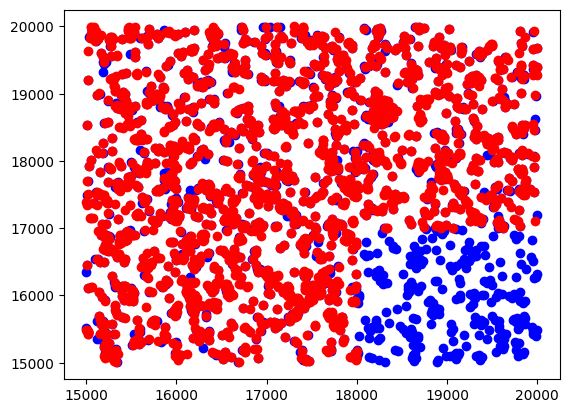

Average data range: 4997.53475413603
Hausdorff Distance: 1851.388948201404
Hausdorff Distance normalized to range (%): 37.046044485617


37.046044485617

In [26]:
# test Hausdorff with tissue fall off
partial_seg_comp_df = seg_comp_df.copy()
partial_seg_comp_df = partial_seg_comp_df[~((partial_seg_comp_df['source'] == 'SIS') & (partial_seg_comp_df['center_x'] > 18000) & (partial_seg_comp_df['center_y'] < 17000))]
spatial_compare.utils.get_normalized_Hausdorff(partial_seg_comp_df,'XEN','SIS')